In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, classification_report

# plt.style.use('ggplot')
plt.style.use('classic')

import nltk
# nltk.download()
# nltk.download('averaged_perceptron_tagger')

In [2]:
# Read in data
df = pd.read_csv('train.csv')
print(df.shape)
df = df.head(1000)
print(df.shape)

(79425, 15)
(1000, 15)


C:\Users\lucci\AppData\Local\Temp\ipykernel_21188\1209609168.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [3]:
df.head()

,ID,submission_date,reviewer_id,reviewer_birth_year,reviewer_gender,reviewer_state,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,review_text,recommend_to_a_friend,rating
0,1,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,1958.0,F,RJ,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,Estou contente com a compra entrega rápida o ú...,Yes,4
1,2,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,1996.0,M,SC,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade","Por apenas R$1994.20,eu consegui comprar esse ...",Yes,4
2,3,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,1984.0,M,SP,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,Yes,4
3,4,2018-01-01 01:27:23,28b1844e1cd24dd2288b7cafb052a0b46aed53ab28e1c1...,1979.0,M,PA,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas",Produto imperdível,"Excelente produto, por fora em material acríli...",Yes,5
4,5,2018-01-01 01:54:38,48907a04d70947344017b351e8fc232bfc80dae2c33ac2...,NaN,NaN,NaN,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas",ótimo,"produto mto bom, com essa garrafinha vc pode a...",Yes,5


## EDA

In [4]:
df.shape

(79425, 15)

In [5]:
df.columns

Index(['ID', 'submission_date', 'reviewer_id', 'reviewer_birth_year',
       'reviewer_gender', 'reviewer_state', 'product_id', 'product_name',
       'product_brand', 'site_category_lv1', 'site_category_lv2',
       'review_title', 'review_text', 'recommend_to_a_friend', 'rating'],
      dtype='object')

In [6]:
df.dtypes

ID                         int64
submission_date           object
reviewer_id               object
reviewer_birth_year      float64
reviewer_gender           object
reviewer_state            object
product_id                object
product_name              object
product_brand             object
site_category_lv1         object
site_category_lv2         object
review_title              object
review_text               object
recommend_to_a_friend     object
rating                     int64
dtype: object

In [7]:
df.describe()


,ID,reviewer_birth_year,rating
count,79425.000000,75874.000000,79425.000000
mean,39713.000000,1977.525015,3.486572
std,22928.166902,20.102430,1.532714
min,1.000000,59.000000,1.000000
25%,19857.000000,1969.000000,2.000000
50%,39713.000000,1980.000000,4.000000
75%,59569.000000,1987.000000,5.000000
max,79425.000000,2018.000000,5.000000


In [4]:
df['rating'].value_counts().sort_index()

1    190
2     62
3    117
4    248
5    383
Name: rating, dtype: int64

In [5]:
df['rating'].unique()

array([4, 5, 1, 2, 3], dtype=int64)

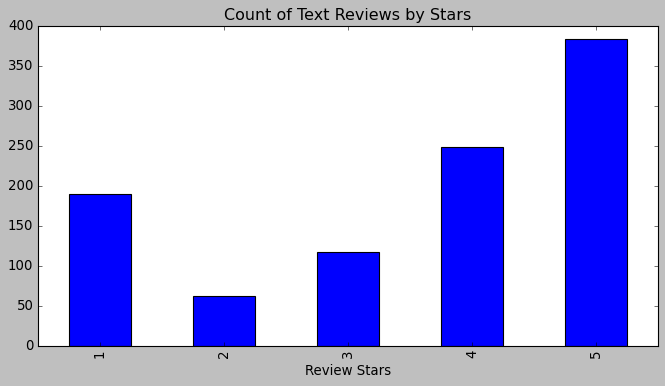

In [6]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Text Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

### Data Preparation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

### Check for missing values

In [8]:
df.isna().sum()

ID                         0
submission_date            0
reviewer_id                0
reviewer_birth_year       70
reviewer_gender           58
reviewer_state            57
product_id                 0
product_name               0
product_brand            636
site_category_lv1          0
site_category_lv2         21
review_title               3
review_text               40
recommend_to_a_friend      0
rating                     0
dtype: int64

In [7]:
df.isnull().sum()

ID                         0
submission_date            0
reviewer_id                0
reviewer_birth_year       70
reviewer_gender           58
reviewer_state            57
product_id                 0
product_name               0
product_brand            636
site_category_lv1          0
site_category_lv2         21
review_title               3
review_text               40
recommend_to_a_friend      0
rating                     0
dtype: int64

In [9]:
df.dropna(subset=['review_text'], inplace=True)

In [10]:
df.isnull().sum()

ID                         0
submission_date            0
reviewer_id                0
reviewer_birth_year       54
reviewer_gender           42
reviewer_state            41
product_id                 0
product_name               0
product_brand            603
site_category_lv1          0
site_category_lv2         19
review_title               3
review_text                0
recommend_to_a_friend      0
rating                     0
dtype: int64

In [11]:
df.shape

(960, 15)

In [9]:
df.loc[df.duplicated()]

,ID,submission_date,reviewer_id,reviewer_birth_year,reviewer_gender,reviewer_state,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,review_text,recommend_to_a_friend,rating


## Basic NLTK

In [9]:
example = df['review_text'][50]
print(example)

Produto de péssima qualidade quase tudo de papelão não acompanha os carrinhos produto de qualidade inferior. Não comprem não iludam seus filhos. produto lixo


In [38]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Produto',
 'de',
 'péssima',
 'qualidade',
 'quase',
 'tudo',
 'de',
 'papelão',
 'não',
 'acompanha']

In [44]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Produto', 'NNP'),
 ('de', 'FW'),
 ('péssima', 'FW'),
 ('qualidade', 'FW'),
 ('quase', 'NN'),
 ('tudo', 'NN'),
 ('de', 'IN'),
 ('papelão', 'FW'),
 ('não', 'JJ'),
 ('acompanha', 'NN')]

In [48]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\lucci\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [49]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\lucci\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [50]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Produto/NNP)
  de/FW
  péssima/FW
  qualidade/FW
  quase/NN
  tudo/NN
  de/IN
  papelão/FW
  não/JJ
  acompanha/NN
  os/NN
  carrinhos/JJ
  produto/NN
  de/IN
  qualidade/FW
  inferior/NN
  ./.
  Não/NNP
  comprem/NN
  não/NN
  iludam/NN
  seus/NN
  filhos/NN
  ./.
  produto/NN
  lixo/NN)


## VADER Sentiment Scoring

In [12]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lucci\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
# from tqdm.notebook import tqdm
from googletrans import Translator

sia = SentimentIntensityAnalyzer()
translator = Translator()


In [9]:
translator = Translator()
translated = translator.translate('Eu amo programar em Python!', src='pt', dest='en')
translated_str = translated.text

# Análise de sentimento
score = sia.polarity_scores(translated_str)

print(score)

{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.6696}


In [ ]:
sia.polarity_scores('I am so happy!')

In [5]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [10]:
sia.polarity_scores(example)

{'neg': 0.105, 'neu': 0.895, 'pos': 0.0, 'compound': -0.4019}

In [ ]:
def translate_g(text):    
    try:
        translated = translator.translate(text, src='pt', dest='en')
        translated_str = translated.text
        return translated_str
    except:
        return text


In [ ]:

res = {}
for i, row in df.iterrows():
    text = row['review_text']
    

    text_pt = translate_g(text)
    myid = row['ID']
    res[myid] = sia.polarity_scores(text_pt)
    

In [15]:
res

{1: {'neg': 0.158, 'neu': 0.733, 'pos': 0.109, 'compound': -0.1779},
 2: {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.6833},
 3: {'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.6541},
 4: {'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.9413},
 5: {'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.7526},
 6: {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.765},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 0.504, 'pos': 0.496, 'compound': 0.7841},
 10: {'neg': 0.081, 'neu': 0.81, 'pos': 0.109, 'compound': -0.1431},
 11: {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.2111},
 12: {'neg': 0.104, 'neu': 0.79, 'pos': 0.106, 'compound': 0.0083},
 13: {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.7003},
 14: {'neg': 0.0, 'neu': 0.559, 'pos': 0.441, 'compound': 0.7278},
 15: {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612},
 16: {'neg': 

In [16]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')


In [19]:
vaders.head()

,ID,neg,neu,pos,compound,submission_date,reviewer_id,reviewer_birth_year,reviewer_gender,reviewer_state,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,review_text,recommend_to_a_friend,rating
0,1,0.158,0.733,0.109,-0.1779,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,1958.0,F,RJ,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,Estou contente com a compra entrega rápida o ú...,Yes,4
1,2,0.000,0.684,0.316,0.6833,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,1996.0,M,SC,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade","Por apenas R$1994.20,eu consegui comprar esse ...",Yes,4
2,3,0.000,0.873,0.127,0.6541,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,1984.0,M,SP,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,Yes,4
3,4,0.000,0.575,0.425,0.9413,2018-01-01 01:27:23,28b1844e1cd24dd2288b7cafb052a0b46aed53ab28e1c1...,1979.0,M,PA,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas",Produto imperdível,"Excelente produto, por fora em material acríli...",Yes,5
4,5,0.000,0.774,0.226,0.7526,2018-01-01 01:54:38,48907a04d70947344017b351e8fc232bfc80dae2c33ac2...,NaN,NaN,NaN,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas",ótimo,"produto mto bom, com essa garrafinha vc pode a...",Yes,5


## Plot VADER results

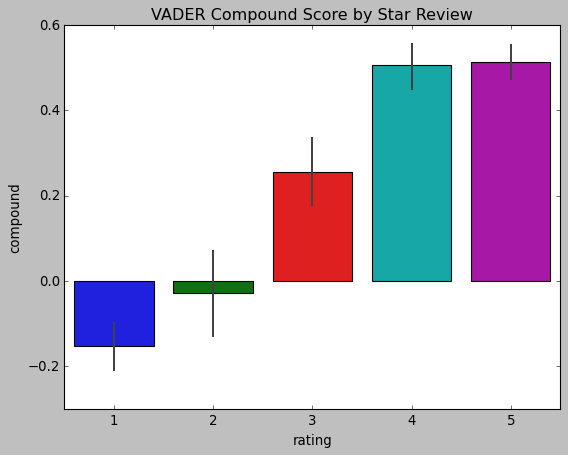

In [22]:
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('VADER Compound Score by Star Review')
plt.show()

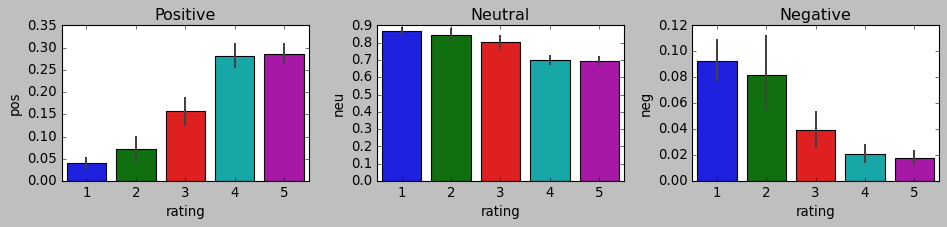

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Classification Models - Test

In [25]:
# Somente as colunas review_text e rating
X = df['review_text']
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words_portuguese = stopwords.words('portuguese')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
vectorizer = TfidfVectorizer(stop_words=stop_words_portuguese, max_features=5000) 
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [28]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [29]:
# Treinar o modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Codifica as classes para começar de 0
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Agora, transforme os dados em estrutura DMatrix do XGBoost
dtrain = xgb.DMatrix(X_train_vec, label=y_train_encoded)
dtest = xgb.DMatrix(X_test_vec, label=y_test_encoded)


In [31]:

# Transformar dados em estrutura DMatrix do XGBoost
# dtrain = xgb.DMatrix(X_train_vec, label=y_train)
# dtest = xgb.DMatrix(X_test_vec, label=y_test)

# Definir parâmetros
params = {
    'objective': 'multi:softmax',  # classificação multiclasse
    'num_class': len(y.unique()),  # número de classes
    'booster': 'gbtree',
    'eta': 0.3,  # taxa de aprendizado
    'max_depth': 6,
    'seed': 42
}

# Treinar
num_round = 50  # número de rodadas (árvores)
bst = xgb.train(params, dtrain, num_round)

In [32]:
# Treinar o modelo SVM
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train_vec, y_train)


SVC(C=1, kernel='linear', random_state=42)

In [35]:
svm_linear = LinearSVC(C=1, random_state=42)
svm_linear.fit(X_train_vec, y_train)


LinearSVC(C=1, random_state=42)

In [36]:
# Previsões
y_pred = clf.predict(X_test_vec)
y_pred_rf = rf.predict(X_test_vec)
y_pred_xgb = bst.predict(dtest)
y_pred_svm = svm.predict(X_test_vec)
y_pred_svm_linear = svm_linear.predict(X_test_vec)

# Avaliando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Logistic Regression: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Avaliando a acurácia
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do Random Forest: {accuracy_rf:.2f}")
print(classification_report(y_test, y_pred_rf))

# Avaliando a acurácia
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Acurácia do XGBoost: {accuracy_xgb:.2f}")
print(classification_report(y_test, y_pred_xgb))

# Avaliando a acurácia
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Acurácia do SVM: {accuracy_svm:.2f}")
print(classification_report(y_test, y_pred_svm))

# Avaliando a acurácia
accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
print(f"Acurácia do SVM Linear: {accuracy_svm_linear:.2f}")
print(classification_report(y_test, y_pred_svm_linear))


Acurácia do Logistic Regression: 0.58
              precision    recall  f1-score   support

           1       0.65      0.77      0.71        44
           2       0.00      0.00      0.00        15
           3       0.50      0.04      0.07        27
           4       0.47      0.34      0.40        76
           5       0.59      0.83      0.69       126

    accuracy                           0.58       288
   macro avg       0.44      0.40      0.37       288
weighted avg       0.53      0.58      0.52       288

Acurácia do Random Forest: 0.51
              precision    recall  f1-score   support

           1       0.64      0.64      0.64        44
           2       0.50      0.07      0.12        15
           3       0.08      0.04      0.05        27
           4       0.34      0.17      0.23        76
           5       0.55      0.83      0.66       126

    accuracy                           0.51       288
   macro avg       0.42      0.35      0.34       288
weighte

C:\Users\lucci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucci\anaconda3\Lib\site-packages\sklearn\metr